# **Final Project by Cameron F. and Tommy H.**




**DATASET**
💡 Worldwide Average IQ Levels 🧠

Global IQ Insights - Intelligence and Socioeconomic Factors Data


by Abhijit Dahatonde


Explore the "Worldwide Average IQ Levels and Socioeconomic Factors Dataset" to gain insights into the intelligence quotient (IQ) levels of different countries and their related socioeconomic factors.

## **1. Data Loading and Inspection**

*Recomend 75% page zoom (ctrl -)*

**Load the nessesary libraires**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset into a Pandas DataFrame**

In [ ]:
#Import the dataset to the colab
url = "https://raw.githubusercontent.com/Thegpsgameboy/IQ-Dataset/main/IQ_level.csv"
world_IQ = pd.read_csv(url)

**Display basic information about the dataset**

Take note of the NaN values in the head and tail

In [ ]:
world_IQ.head(10)

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1
5,6,South Korea,103,1024.0,22805.0,18.2
6,7,Netherlands,101,2386.0,45337.0,14.4
7,8,Finland,101,2725.0,42706.0,8.2
8,9,Canada,100,2052.0,40207.0,7.4
9,10,North Korea,100,NaN,NaN,15.3


In [ ]:
world_IQ.tail(10)

,rank,country,IQ,education_expenditure,avg_income,avg_temp
98,99,Ethiopia,67,21.0,379.0,27.2
99,100,Cameroon,67,36.0,1234.0,31.1
100,101,Congo,64,7.0,316.0,30.4
101,102,Ghana,61,76.0,1166.0,32.1
102,103,Ivory Coast,61,69.0,1289.0,32.2
103,104,Equatorial Guinea,56,NaN,7625.0,29.9
104,105,Gambia,55,14.0,648.0,32.9
105,106,Guatemala,55,92.0,2830.0,32.1
106,107,Sierra Leone,52,16.0,412.0,30.4
107,108,Nepal,51,22.0,595.0,24.6


In [ ]:
world_IQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   108 non-null    int64  
 1   country                108 non-null    object 
 2   IQ                     108 non-null    int64  
 3   education_expenditure  103 non-null    float64
 4   avg_income             106 non-null    float64
 5   avg_temp               108 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.2+ KB


**Check for the missing values that will be cleaned in the nest step**

In [ ]:
world_IQ.isnull().sum()

rank                     0
country                  0
IQ                       0
education_expenditure    5
avg_income               2
avg_temp                 0
dtype: int64

# **2. Data Cleaning**


**Show the data that has NaN values in it**

In [ ]:
#Get indexes with NaN values
indexes_with_nan = world_IQ[world_IQ.isna().any(axis=1)].index.tolist()

#Show the rows that have NaN values
print("Countries that have NaN values are: \n")
for i in indexes_with_nan:
  print(world_IQ.iloc[i])
  print("")

Countries that have NaN values are: 

rank                           4
country                  Taiwan 
IQ                           106
education_expenditure        NaN
avg_income                   NaN
avg_temp                    26.9
Name: 3, dtype: object

rank                              10
country                  North Korea
IQ                               100
education_expenditure            NaN
avg_income                       NaN
avg_temp                        15.3
Name: 9, dtype: object

rank                             62
country                  Montenegro
IQ                               85
education_expenditure           NaN
avg_income                   6056.0
avg_temp                       21.1
Name: 61, dtype: object

rank                          98
country                  Nigeria
IQ                            68
education_expenditure        NaN
avg_income                1752.0
avg_temp                    33.3
Name: 97, dtype: object

rank                          

**Drop the data that has NaN vlaues it in**

In [ ]:
world_IQ = world_IQ.dropna()

#re-check for NaN values
world_IQ.isnull().sum()

rank                     0
country                  0
IQ                       0
education_expenditure    0
avg_income               0
avg_temp                 0
dtype: int64

**Check for duplicated rows**

In [ ]:
#check for duplicated rows
duplicate_rows = world_IQ.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

#drop any duplicated rows that might exist
world_IQ = world_IQ.drop_duplicates()

Number of duplicate rows: 0


**Reset Index and rank after dropping NaN and Duplicated rows**

In [ ]:
world_IQ.reset_index(drop = True, inplace = True)
world_IQ["rank"] = world_IQ.index + 1

# **3. Descriptive Statistics**

**Compute basic descriptive statistics (mean, median, mode, standard deviation, etc.) for numerical columns**

In [ ]:
world_IQ.describe()

,rank,IQ,education_expenditure,avg_income,avg_temp
count,103.000000,103.000000,103.000000,103.000000,103.000000
mean,52.000000,86.116505,903.058252,17525.048544,23.788350
std,29.877528,12.624518,1166.625835,21067.803552,8.471235
min,1.000000,51.000000,1.000000,316.000000,0.400000
25%,26.500000,79.000000,81.500000,2285.500000,17.100000
50%,52.000000,88.000000,336.000000,7586.000000,25.600000
75%,77.500000,97.000000,1360.000000,31122.500000,31.350000
max,103.000000,106.000000,5436.000000,108349.000000,36.500000


**Explore the distribution of data**

**Histograms of the worlds (IQ, Education Expenditure, Average Income, and Average Temperature)**

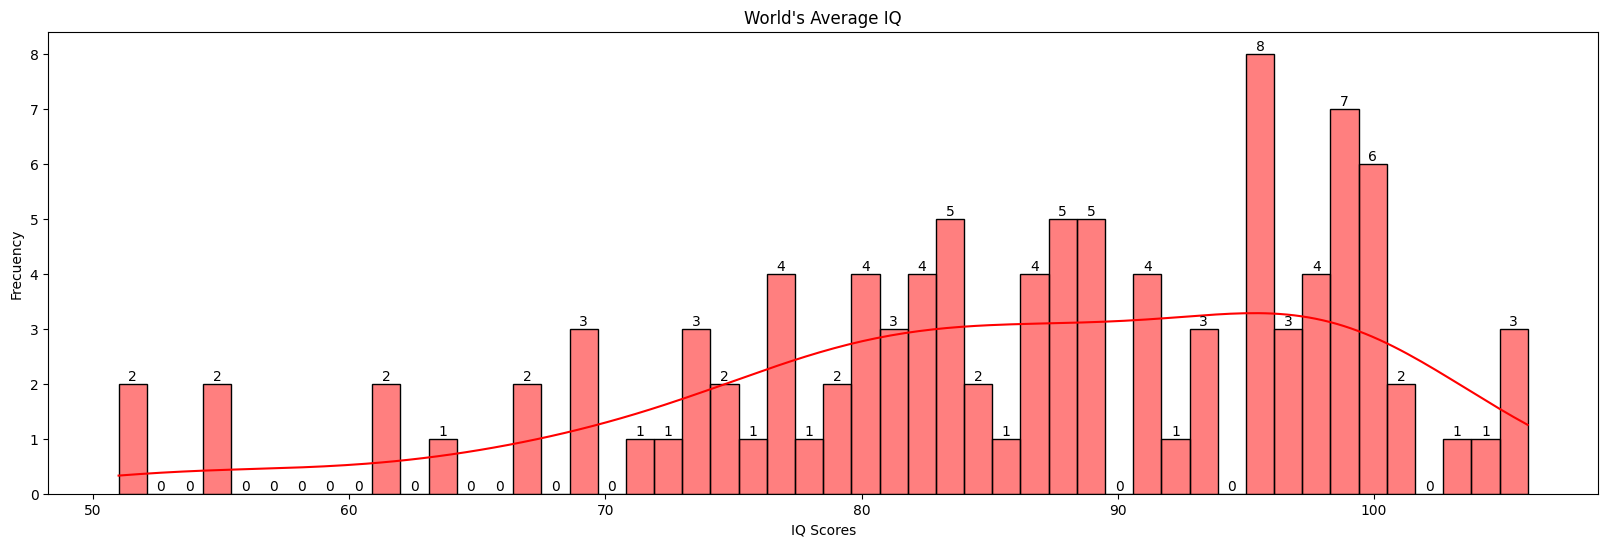

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.histplot(data=world_IQ, x = "IQ", bins = 50, kde = True, color="red")
for lables in ax.containers:
  ax.bar_label(lables)
plt.title("World's Average IQ")
plt.xlabel("IQ Scores")
plt.ylabel("Frecuency")
plt.show()

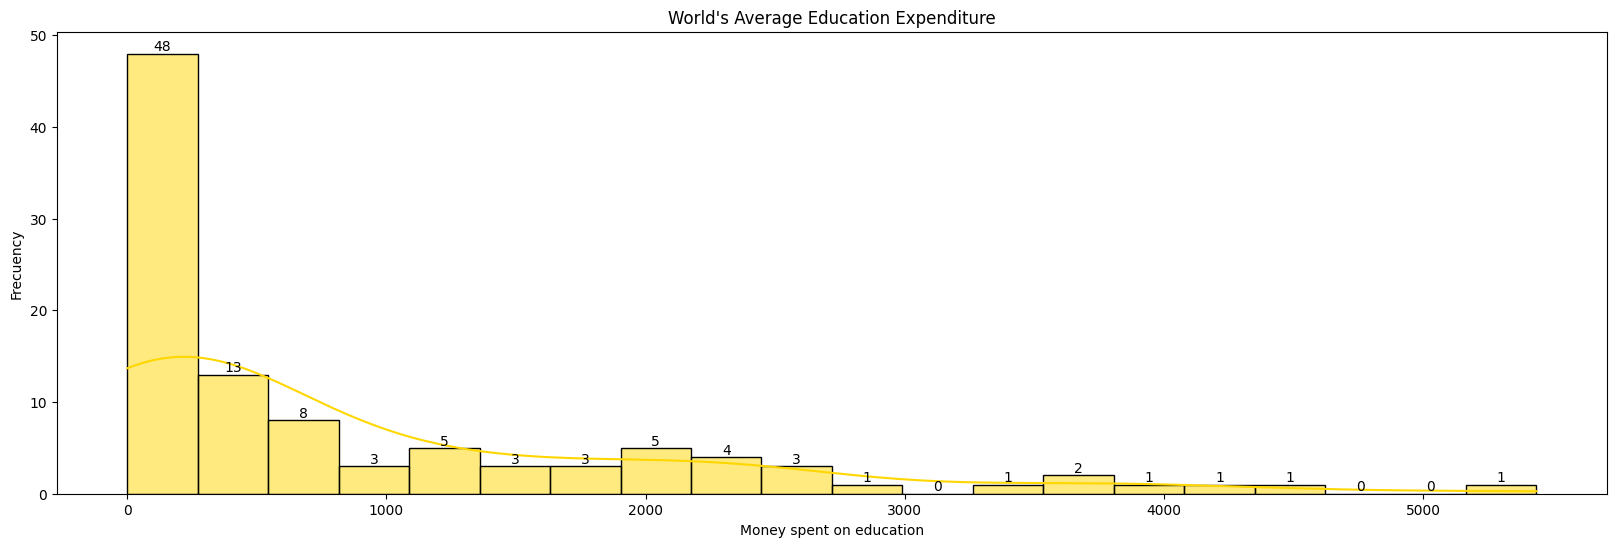

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.histplot(data=world_IQ,x = "education_expenditure", bins = 20, kde = True , color="gold")
for lables in ax.containers:
  ax.bar_label(lables)
plt.title("World's Average Education Expenditure")
plt.xlabel("Money spent on education")
plt.ylabel("Frecuency")
plt.show()

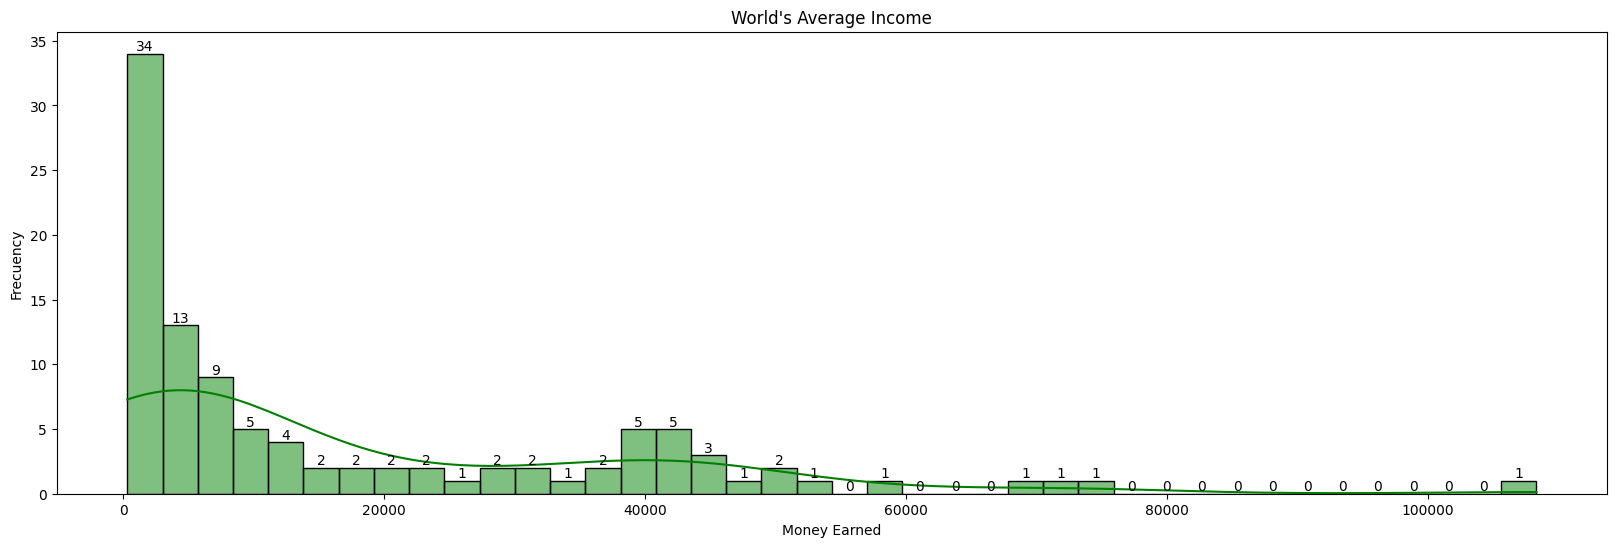

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.histplot(data=world_IQ,x = "avg_income", bins = 40, kde = True , color="green")
for lables in ax.containers:
  ax.bar_label(lables)
plt.title("World's Average Income")
plt.xlabel("Money Earned")
plt.ylabel("Frecuency")
plt.show()

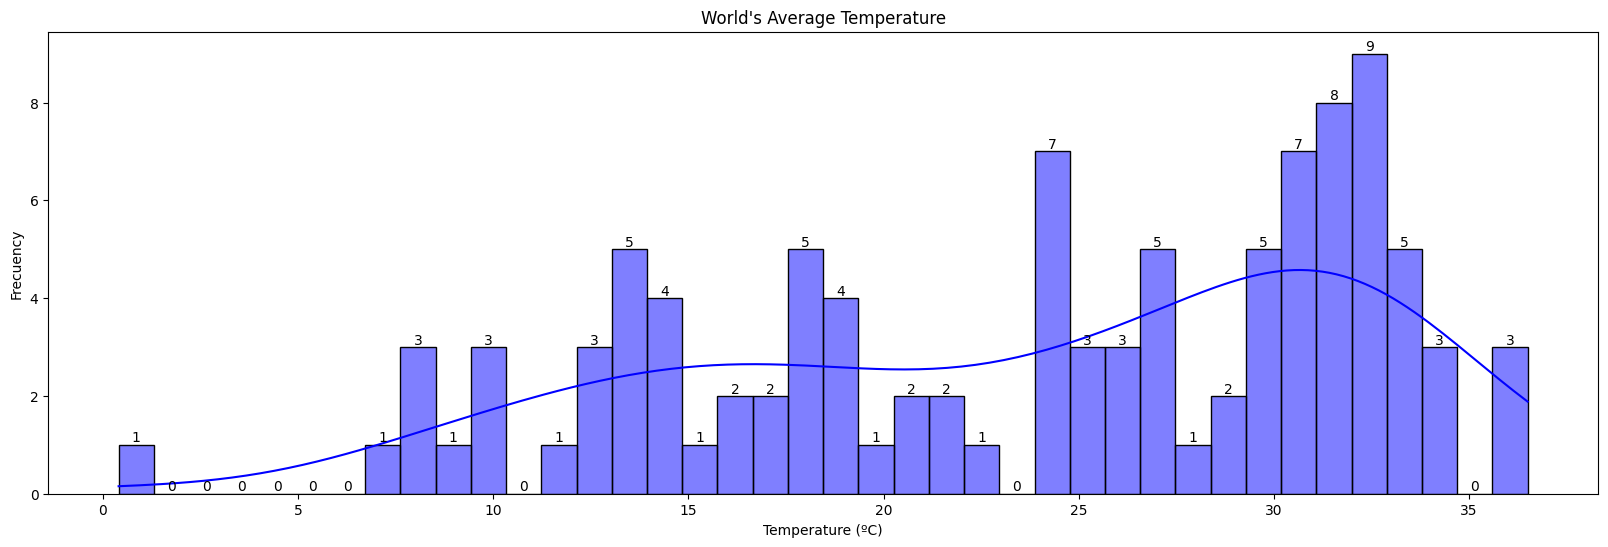

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.histplot(data=world_IQ,x = "avg_temp", bins = 40, kde = True , color="blue")
for lables in ax.containers:
  ax.bar_label(lables)
plt.title("World's Average Temperature")
plt.xlabel("Temperature (ºC)")
plt.ylabel("Frecuency")
plt.show()

**\*Important to note the inability to use boxplots for this dataset\***

# **4. Data Visualization**

**Create visualizations to explore relationships between variables**

**Two barplots that show the IQ and Rankings for the countries in the dataset**

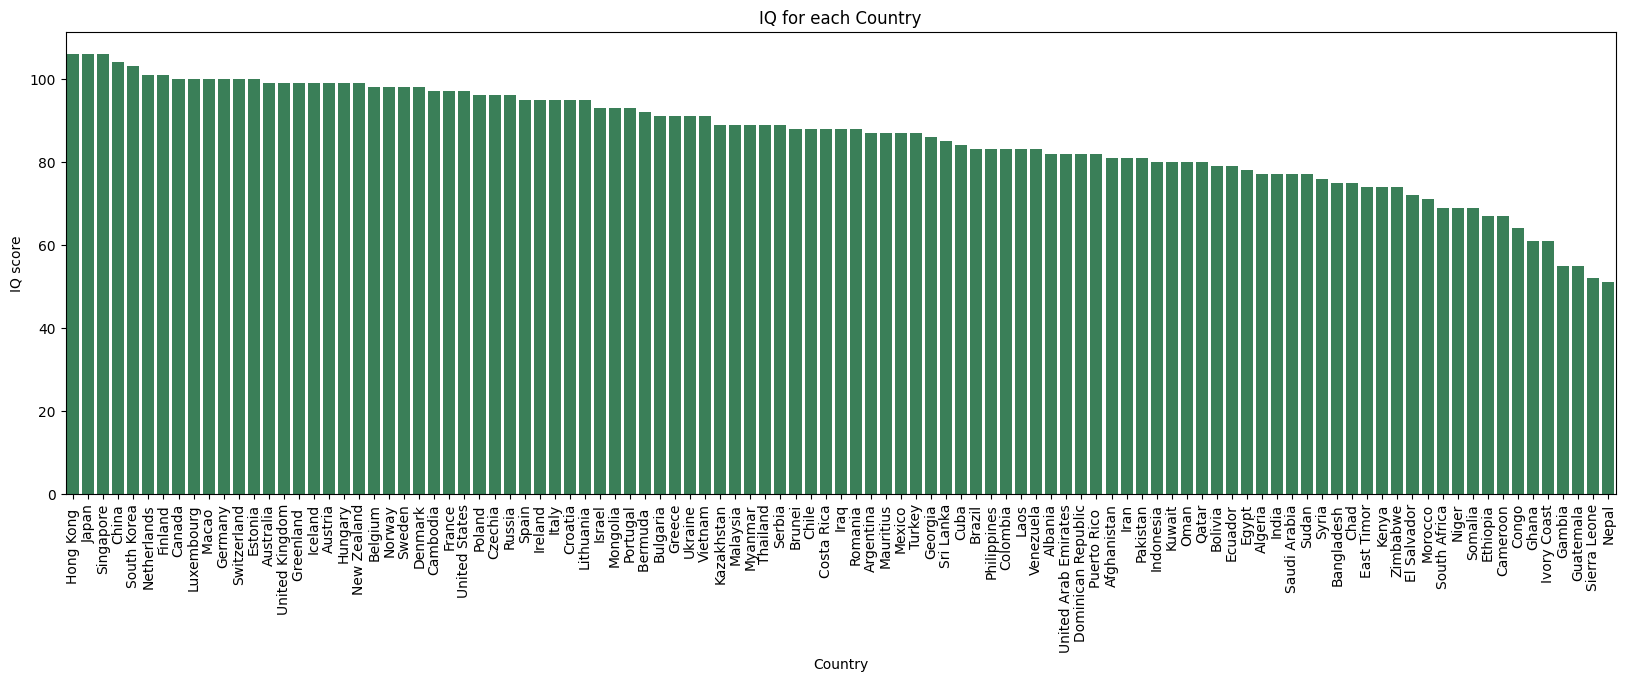

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=world_IQ, x="country", y = "IQ", color="seagreen")
plt.title("IQ for each Country")
plt.xlabel("Country")
plt.ylabel("IQ score")
plt.xticks(rotation=90)
plt.show()

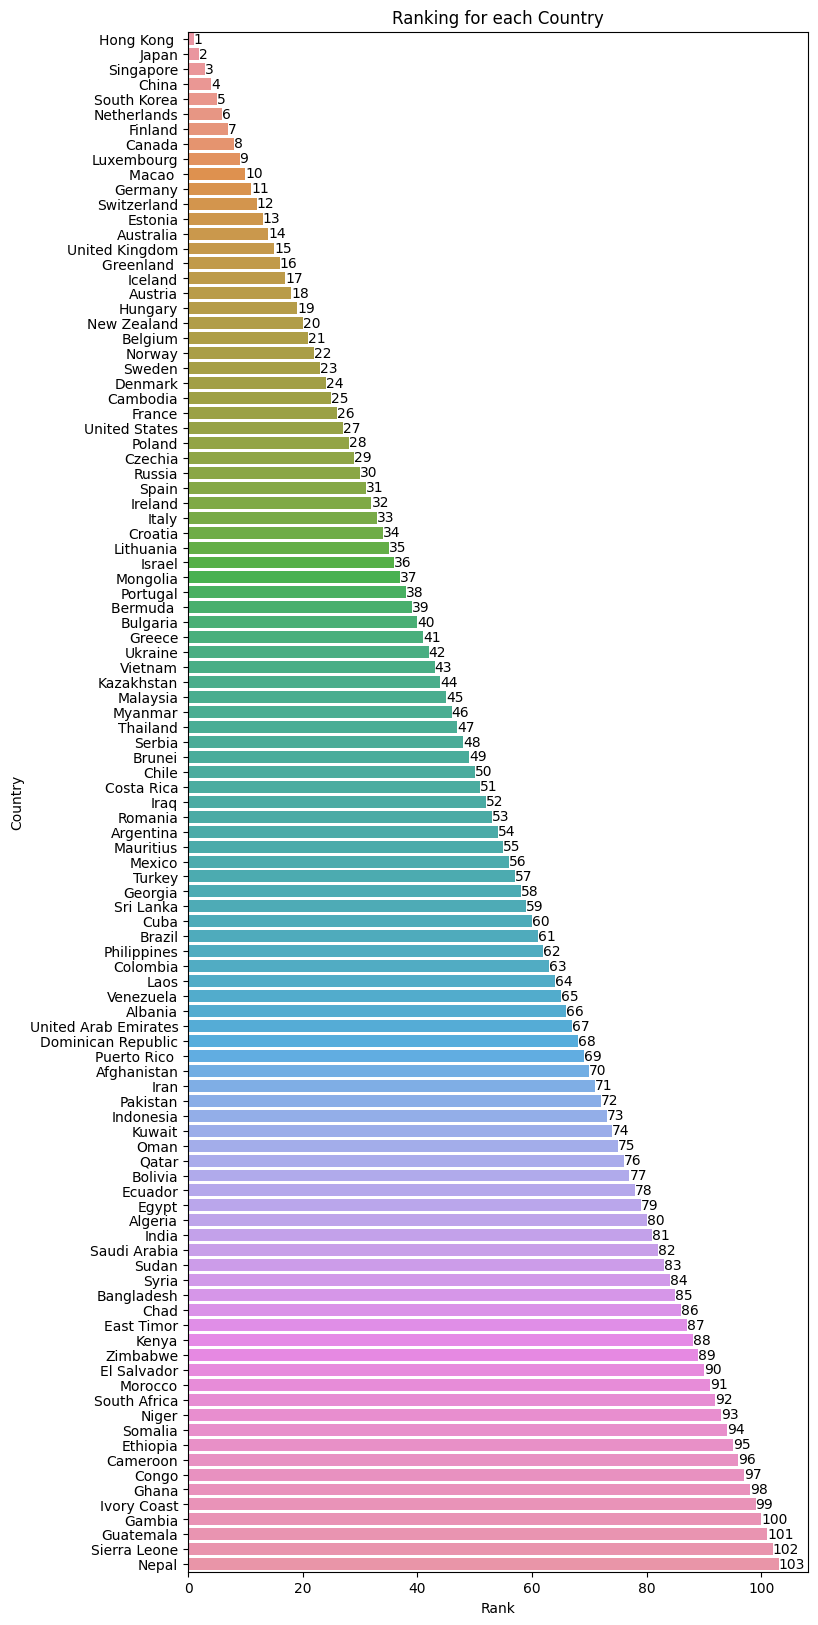

In [ ]:
plt.figure(figsize=(8,20))
ax = sns.barplot(x='rank',y='country', data=world_IQ)
for lables in ax.containers:
  ax.bar_label(lables)
plt.title("Ranking for each Country")
plt.xlabel("Rank")
plt.ylabel("Country")
plt.show()

**[2 x 2] scatter plots that show the data comparisons for resulting IQ scores**

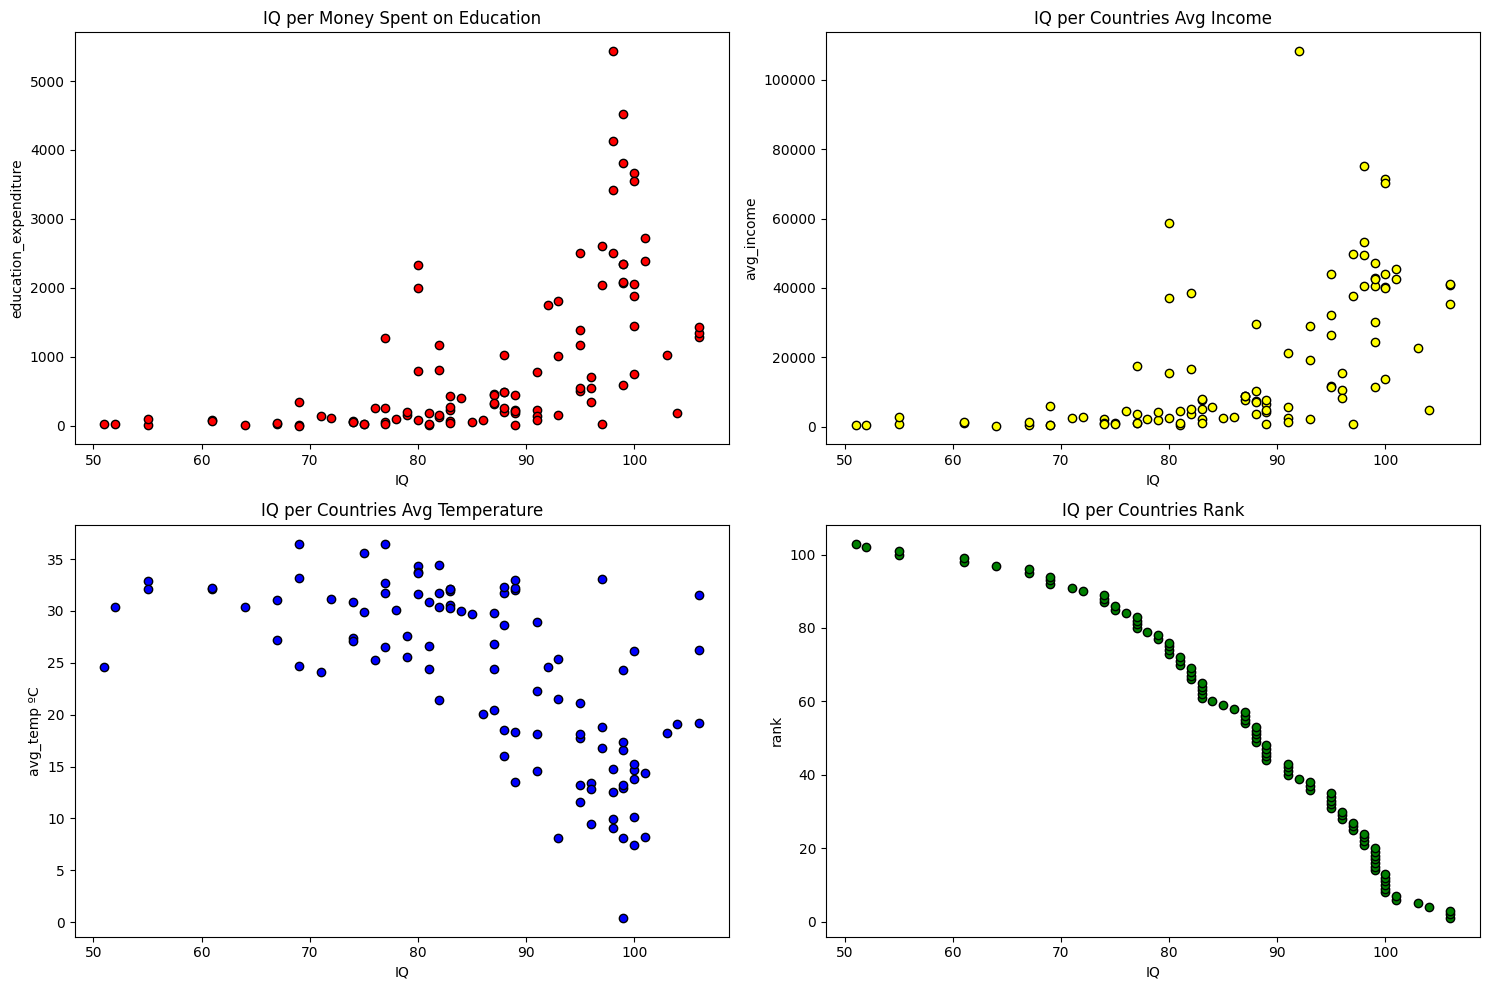

In [ ]:
fig = plt.figure(figsize=(15, 10))

# First plot
plt.subplot(2, 2, 1)
plt.scatter(world_IQ['IQ'], world_IQ['education_expenditure'], edgecolor='black', color='red')
plt.title('IQ per Money Spent on Education')
plt.xlabel('IQ')
plt.ylabel('education_expenditure')

# Second plot
plt.subplot(2, 2, 2)
plt.scatter(world_IQ['IQ'], world_IQ['avg_income'], edgecolor='black', color='yellow')
plt.title('IQ per Countries Avg Income')
plt.xlabel('IQ')
plt.ylabel('avg_income')

# Third plot
plt.subplot(2, 2, 3)
plt.scatter(world_IQ['IQ'], world_IQ['avg_temp'], edgecolor='black', color='blue')
plt.title('IQ per Countries Avg Temperature')
plt.xlabel('IQ')
plt.ylabel('avg_temp ºC')

# Fourth plot
plt.subplot(2, 2, 4)
plt.scatter(world_IQ['IQ'], world_IQ['rank'], edgecolor='black', color='green')
plt.title('IQ per Countries Rank')
plt.xlabel('IQ')
plt.ylabel('rank')

plt.tight_layout()
plt.show()

**[2 x 2] scatter plots that show the data comparisons for resulting Rankings**

*notice the expected similarities and the unexpected diffrences between the two plot groups*

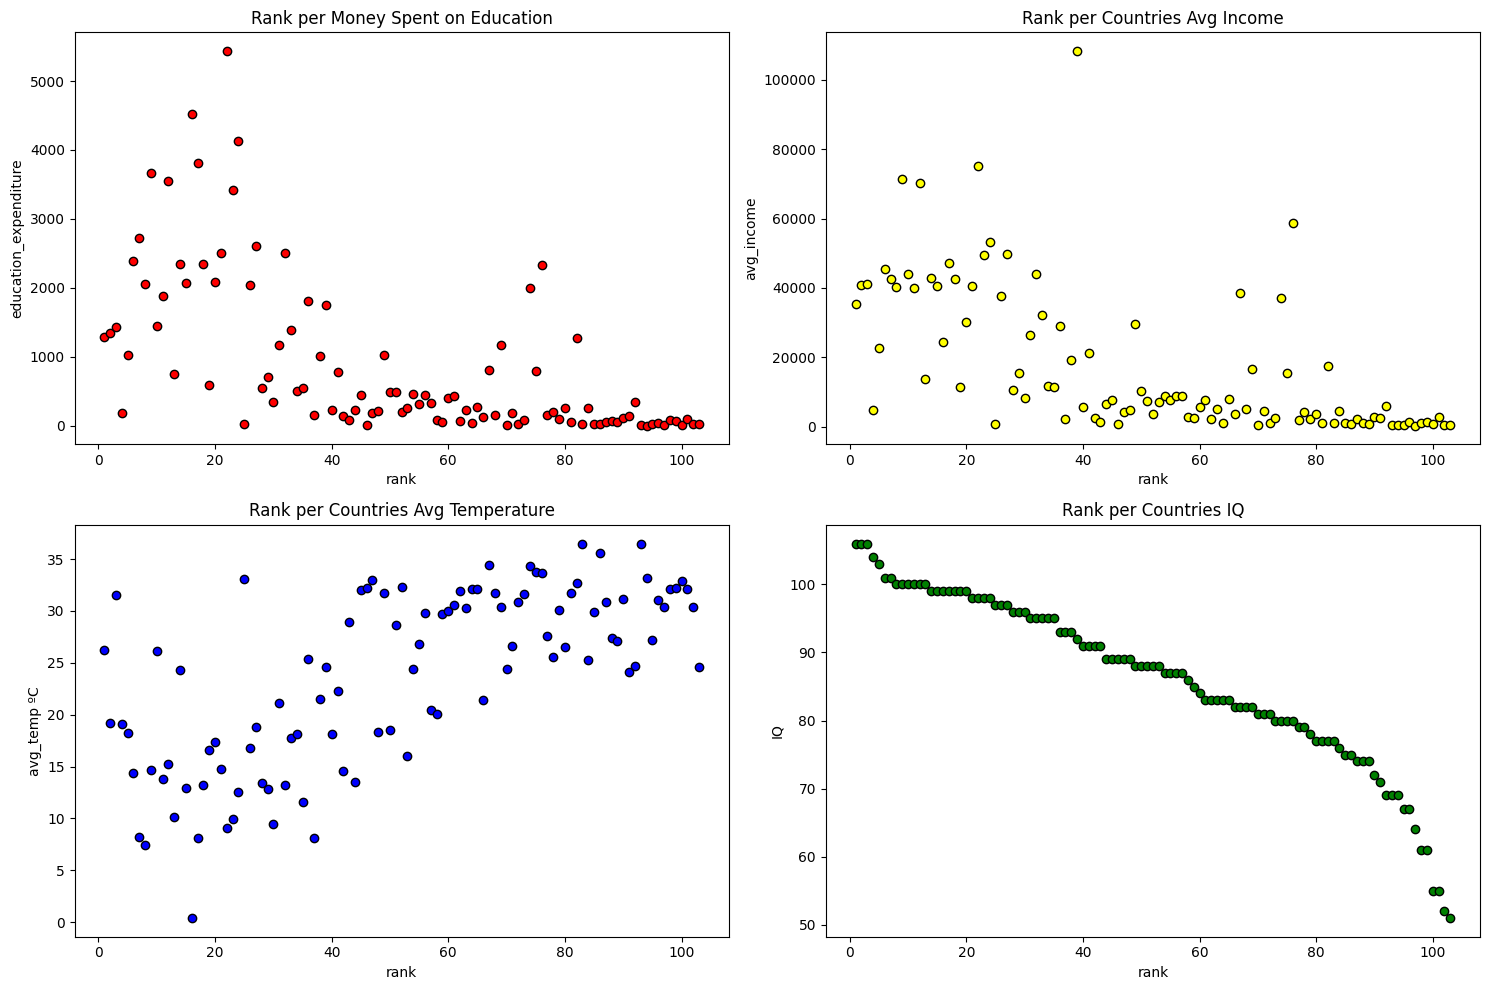

In [ ]:
# Create a 2x2 grid of plots
fig = plt.figure(figsize=(15, 10))

# First plot
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, plot number 1
plt.scatter(world_IQ['rank'], world_IQ['education_expenditure'], edgecolor='black', color='red')
plt.title('Rank per Money Spent on Education')
plt.xlabel('rank')
plt.ylabel('education_expenditure')

# Second plot
plt.subplot(2, 2, 2)
plt.scatter(world_IQ['rank'], world_IQ['avg_income'], edgecolor='black', color='yellow')
plt.title('Rank per Countries Avg Income')
plt.xlabel('rank')
plt.ylabel('avg_income')

# Third plot
plt.subplot(2, 2, 3)
plt.scatter(world_IQ['rank'], world_IQ['avg_temp'], edgecolor='black', color='blue')
plt.title('Rank per Countries Avg Temperature')
plt.xlabel('rank')
plt.ylabel('avg_temp ºC')

# Fourth plot
plt.subplot(2, 2, 4)
plt.scatter(world_IQ['rank'], world_IQ['IQ'], edgecolor='black', color='green')
plt.title('Rank per Countries IQ')
plt.xlabel('rank')
plt.ylabel('IQ')

plt.tight_layout()
plt.show()

**A pairplot to show all the interactions of the data**

<Figure size 1200x700 with 0 Axes>

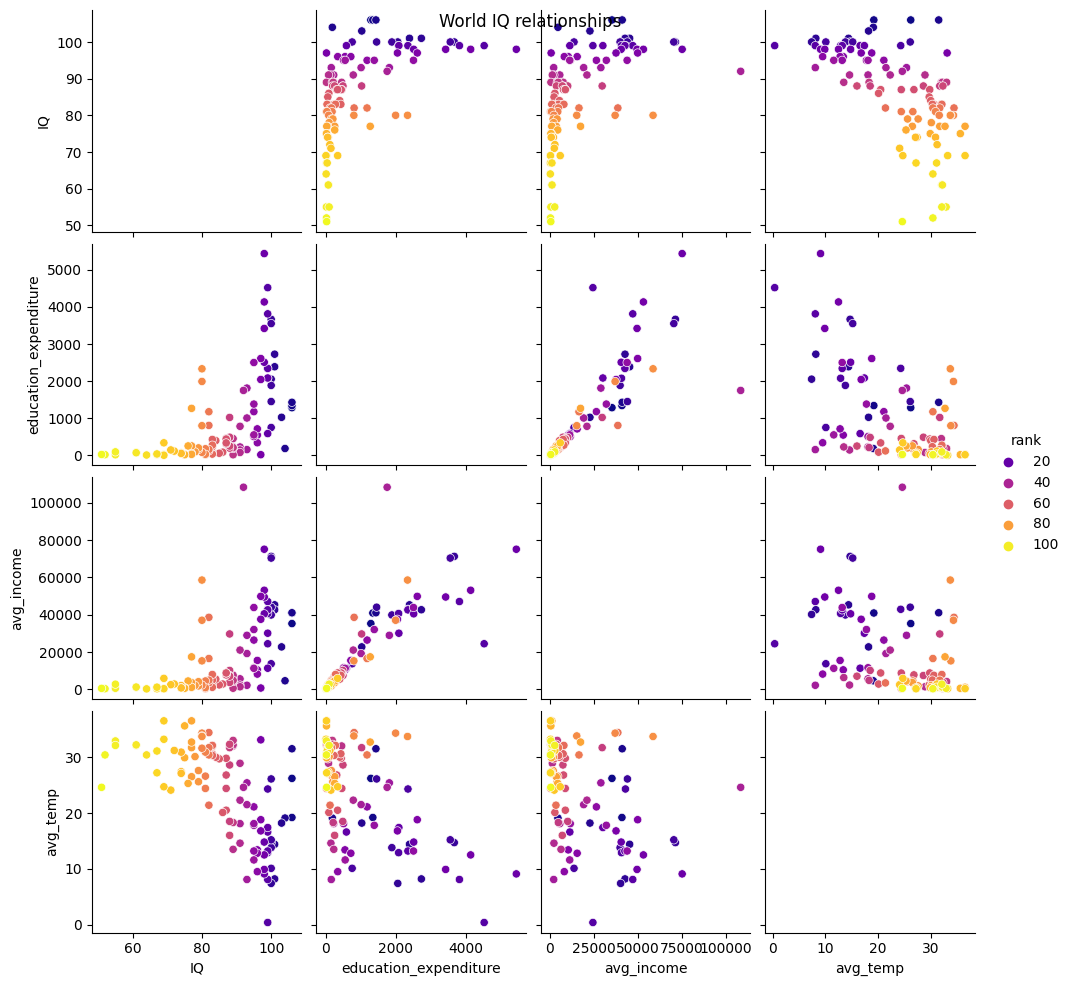

In [ ]:
plt.figure(figsize=(12, 7))
sns.pairplot(world_IQ, hue='rank', palette='plasma')
plt.suptitle("World IQ relationships")
plt.show()

**Setting up a global heat map**

In [ ]:
import warnings
import geopandas as gpd

# Stops FutureWarning from geopandas.datasets for cleaner code return
warnings.filterwarnings('ignore', category=FutureWarning)

# Load the world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#correct the weird name of world_IQ to match the world maps names
world_IQ['country'].replace({'United States': 'United States of America'}, inplace=True)
world_IQ['country'].replace({'Greenland\xa0': 'Greenland'}, inplace=True)
world_IQ['country'].replace({'Hong Kong\xa0': 'Hong Kong'}, inplace=True)
world_IQ['country'].replace({'Macao\xa0': 'Macao'}, inplace=True)
world_IQ['country'].replace({'Bermuda\xa0': 'Bermuda'}, inplace=True)
world_IQ['country'].replace({'Puerto Rico\xa0': 'Puerto Rico'}, inplace=True)

# Merge the IQ dataset with the world map data
merged = world.merge(world_IQ, how='left', left_on='name', right_on='country')

**\*Note not every country is included in the World_IQ data set and the geopandas world map. That is why there may be a few holes in the map.\***

**Global heat maps to visualize the data "with respect to where" for (IQ, Average Temperature, Average Income, and Education expenditure)**

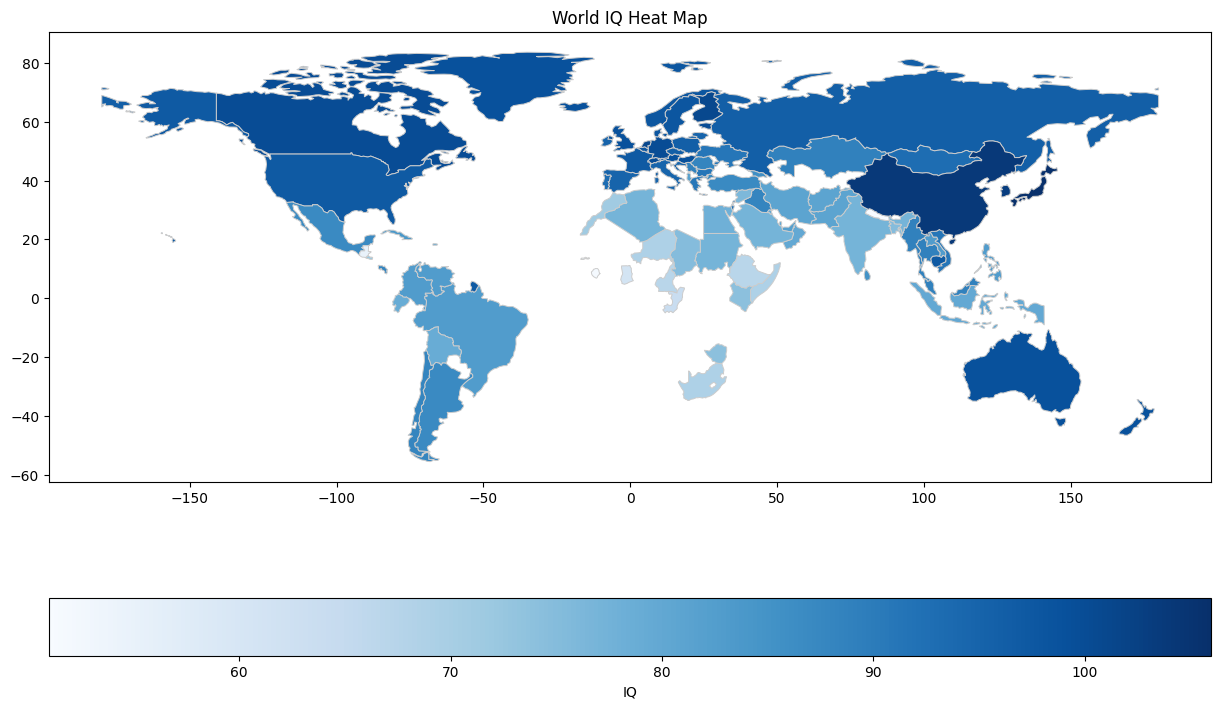

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('World IQ Heat Map')
merged.plot(column='IQ', cmap='Blues', linewidth=0.7, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': 'IQ', 'orientation': "horizontal"})
plt.show()

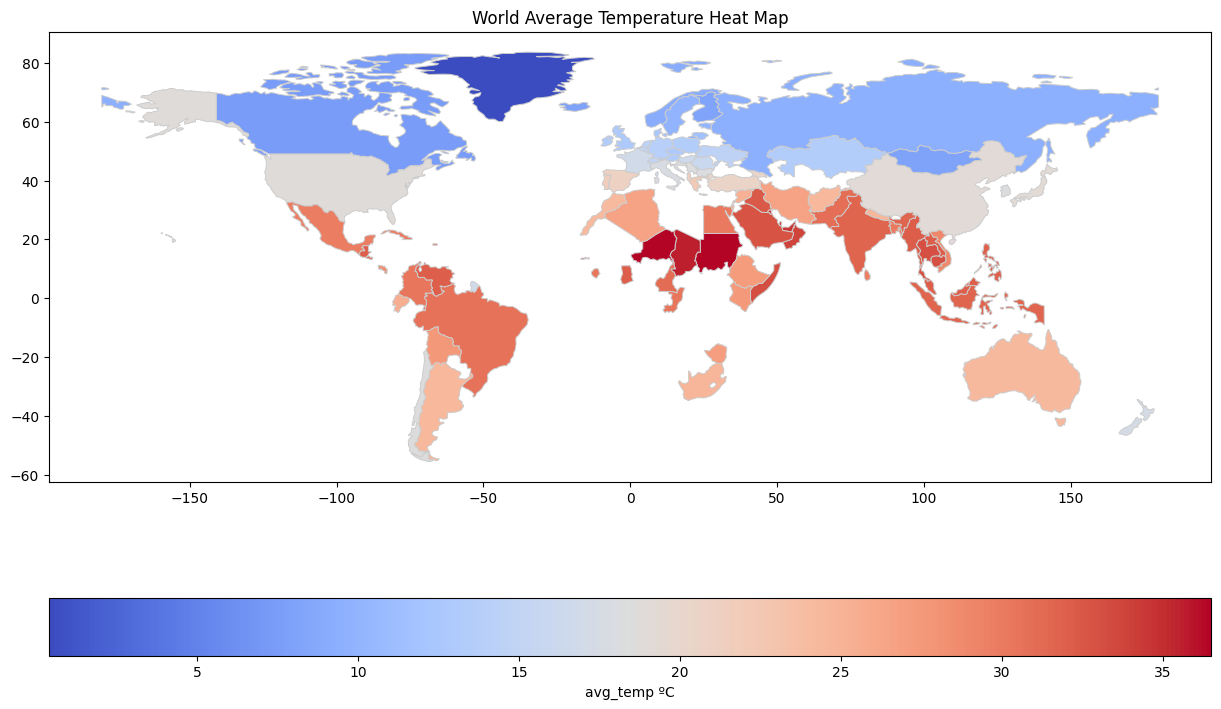

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('World Average Temperature Heat Map')
merged.plot(column='avg_temp', cmap='coolwarm', linewidth=0.7, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': 'avg_temp ºC', 'orientation': "horizontal"})
plt.show()

**\*Notice the similarities in the heat map for Average Income and Education Expenditure\***

**\*Notice the few diffrences\***

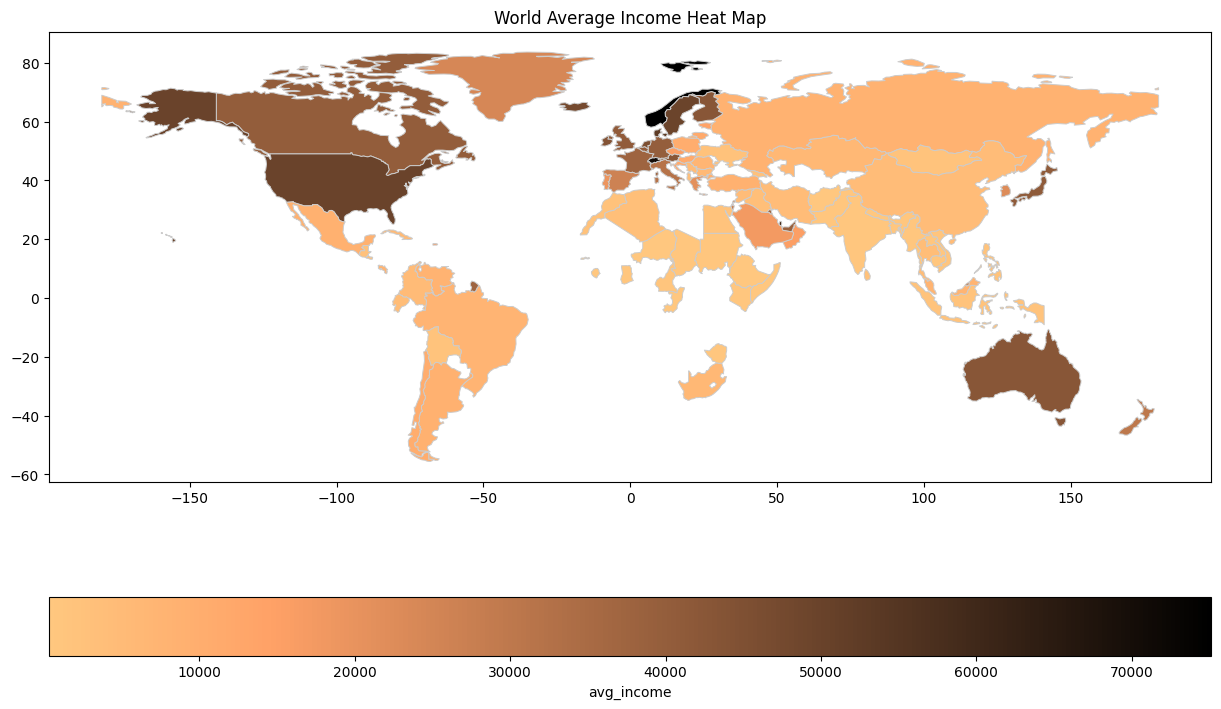

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('World Average Income Heat Map')
merged.plot(column='avg_income', cmap='copper_r', linewidth=0.7, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': 'avg_income', 'orientation': "horizontal"})
plt.show()

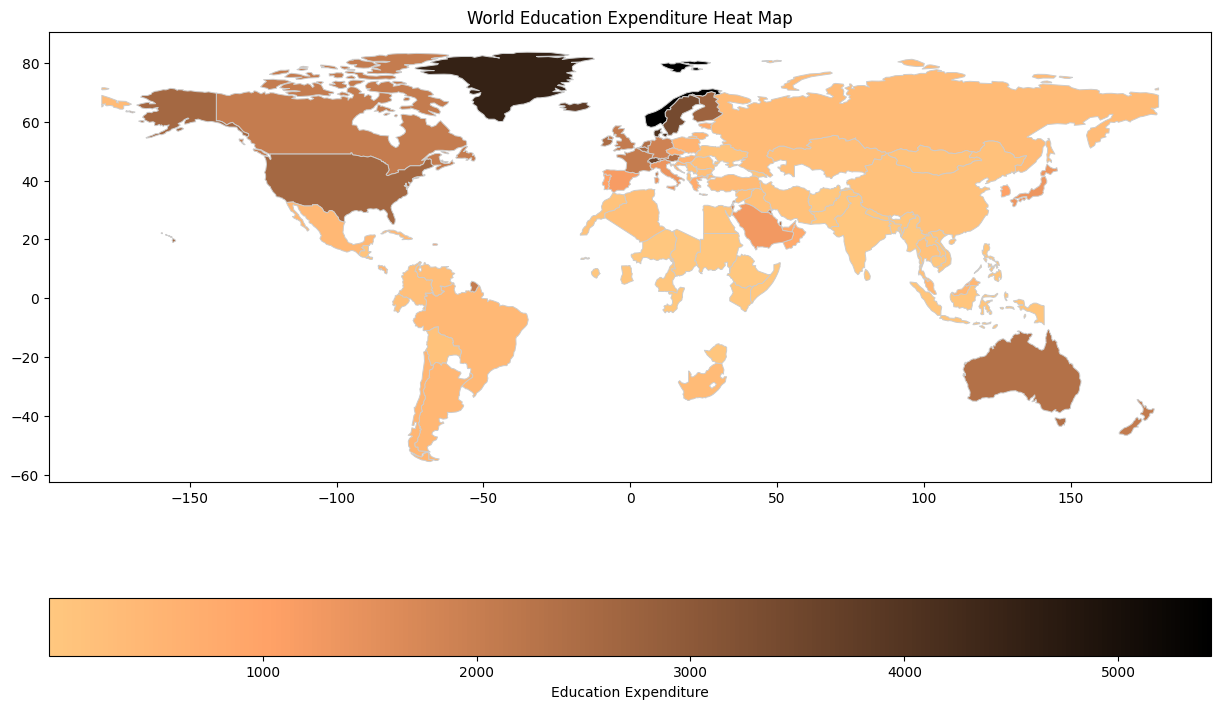

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('World Education Expenditure Heat Map')
merged.plot(column='education_expenditure', cmap='copper_r', linewidth=0.7, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': 'Education Expenditure', 'orientation': "horizontal"})
plt.show()

# **5. Correlation Analysis**

**Correlation matrix passed to a seaborn heatmap to calculate and visualize the correlation between different variables.**

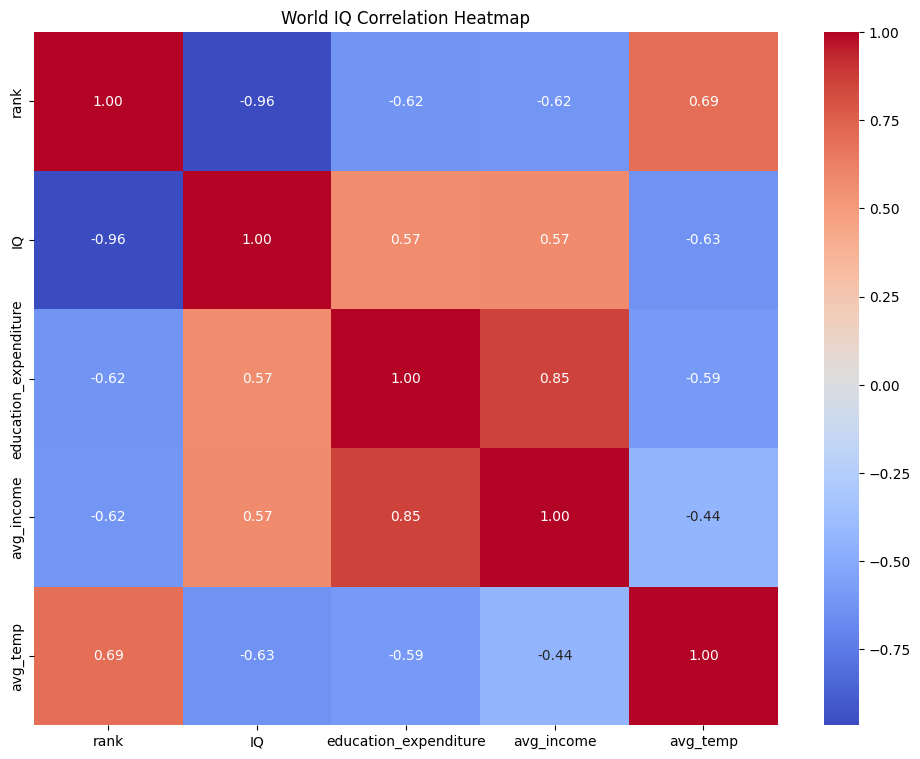

In [ ]:
correlation_matrix = world_IQ.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("World IQ Correlation Heatmap")
plt.show()

**Discuss the findings and any insights gained from the correlation analysis.**

*Values closer to 1 or -1, indicating strong positive or negative correlations respectively. Values around 0 signify weak or no correlation*

1. The data with the highest correlation other than "it vs itself" is **IQ to rank** obviously. But the reason why it is closer to -1 than 1 is because of the way the ranking system is numbered, with 1 being the highest and 100+ being lower. So as IQ goes up, the Ranking goes down to 1. The only reason that there is not  a correlation of 1 is because there were contries with NaN values that got cleaned (removed) from the dataset

2. The data with the second highest correlation is **average income to education expenditure**. Which shows that on average countries with a higher average income spend more on education than countries with lower average income.

3. Something intresting that the data shows is the slight correlation of **Average temperature to rank**. The data shows that on average the contries with a lower average temperature C* rank higher than contries that have a higher average temperature.

# **6. Time Series Analysis (Not applicable)**

# **7. Conclusion and Insights**

**Summarize the key findings and insights obtained from the analysis in the Jupyter Notebook.**

The worlds average IQ score is 86.

The income average per countries is $17,525. (scaled)

The average education expenditure is $903. (scaled)

The average tempature in ºC is 27 degrees.

There seems to be a slight yet insignificant correlation between IQ and tempature.

There is a exponential correlation between IQ and higher income countries.

There is also a exponential correlation between IQ and large education expenditure in countires.

Meaning that on average countries that have a higher average income and spend more on education, test for higher IQ scores.

**Discuss any challenges encountered during the analysis and how they were addressed.**

Challenges we encountered during the analysis was that there were some countires with NAN values that we had to drop which required us to reset the rankings afterwards.

There were also a few of countires missing from the dataset that were not included at all, such as parts of Afrcia and South America.

Other challenges we faced were graphing the world heat map which took some aditional research to figure out.

**Provide recommendations or suggestions for further analysis.**

For future analysis it might be benificial to make subsets of the dataset for better understanding. For instance you could pass a bool function and make a list of the countries that have over a certain $ ammount in avergae income and list them as "rich ", "average", or "poor".

Another example would be to pass a bool function and make a list of the countries that spend over a certain $ ammount on education.

You could also make a clusterplot of areas that diffrent countries reside in and anylize what they mean and if it affects their scoring. Like countries that reside in the East and West Northern hemisphere or East and West Southern hemisphere.  